
# K Nearest Neighbor (KNN)



KNN(K Nearest Neighbor)。クラス判別用の手法。
学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のK個を取得し、多数決でデータが属するクラスを推定する。
教師あり学習。

以下コードではsklearnに含まれるirisデータセットを使用して、sklearnのKNeighborsClassifierで学習。


予測結果と実際を比較して精度を確認。

参考：https://qiita.com/yshi12/items/26771139672d40a0be32

In [ ]:
import pandas as pd
import numpy as np

#sklearnに含まれているirisデータセットを使用

from sklearn.datasets import load_iris
iris= load_iris() # irisデータ取得
X = iris.data     # 説明変数(クラス推定用変数)
Y = iris.target   # 目的変数(クラス値)

# irisのデータをDataFrameに変換
iris_data = pd.DataFrame(X, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_target = pd.DataFrame(Y, columns=['Species'])

# iris_targetが0〜2の値で分かりづらいので、irisの名前に変換する関数を作る
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)
iris = pd.concat([iris_data, iris_target], axis=1)

In [ ]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


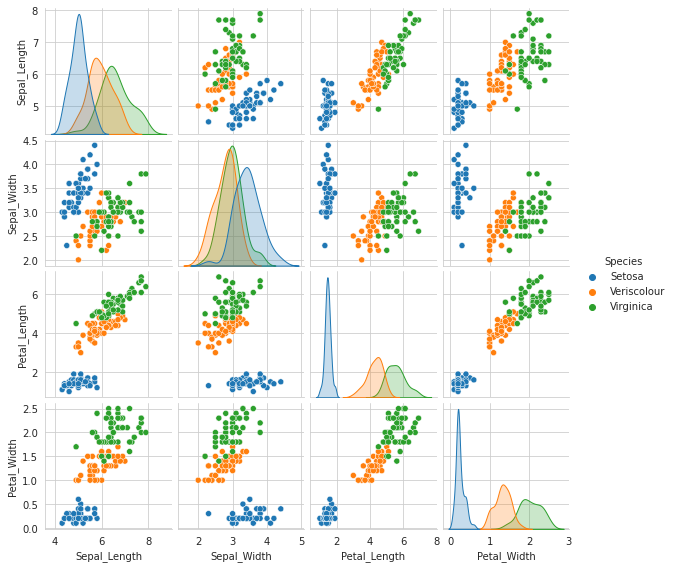

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.pairplot(iris, hue = 'Species', height =2) # hue:指定したデータで分割

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # trainとtest分割用

# train用とtest用のデータ用意。test_sizeでテスト用データの割合を指定。random_stateはseed値を適当にセット。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=3) 

#K近傍法
knn = KNeighborsClassifier(n_neighbors=6) # インスタンス生成。n_neighbors:Kの数
knn.fit(X_train, Y_train)                 # モデル作成実行
Y_pred = knn.predict(X_test)              # 予測実行

# 精度確認用のライブラリインポートと実行
from sklearn import metrics
print('Accuracy = ' + str(metrics.accuracy_score(Y_test, Y_pred)))    # 予測精度計測

Accuracy = 0.9555555555555556


In [ ]:
iris_data_test = pd.DataFrame(X_test, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_target_test = pd.DataFrame(Y_test, columns=['Species'])
iris_target_test['Species'] = iris_target_test['Species'].apply(flower)
iris_test = pd.concat([iris_data_test, iris_target_test], axis=1)

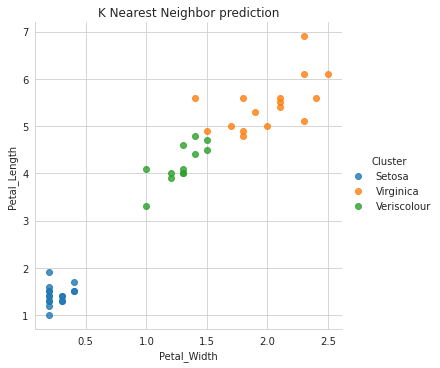

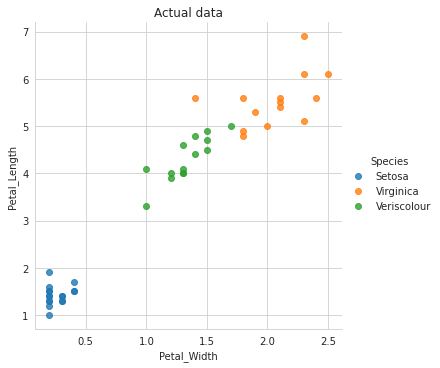

In [ ]:
# グラフ化用DataFrameの作成
temp = iris_test[['Sepal_Length', 'Sepal_Width','Petal_Width', 'Petal_Length', 'Species']].copy()
temp['Cluster'] = knn.predict(X_test)
temp['Cluster'] =temp['Cluster'].apply(flower)

# KNNによるクラスタリングの結果
KNN = sns.lmplot(x='Petal_Width', y='Petal_Length', data=temp, hue='Cluster', fit_reg=False)
KNN.set(title = "K Nearest Neighbor prediction")
# アヤメの品種
Actual = sns.lmplot(x='Petal_Width', y='Petal_Length', data=temp, hue='Species', fit_reg=False)
Actual.set(title = "Actual data")

予測結果と実績が概ね一致。

Accuracyは0.95程度。

Text(0, 0.5, 'Accuracy')

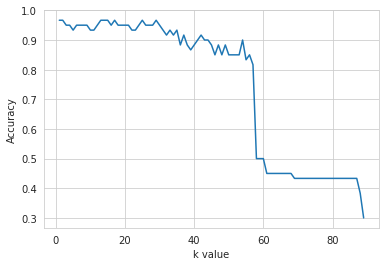

In [ ]:
accuracy = []
k_range = []
for k in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成。
    knn.fit(X_train, Y_train)                 # モデル作成実行
    Y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred)) # 精度格納
    k_range.append(k)

plt.plot(k_range, accuracy)
plt.xlabel("k value")
plt.ylabel("Accuracy")

:最適なk値が存在。大きすぎると精度が悪くなる。